# Predicción de sobrevivir en el Titanic

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
url='https://raw.githubusercontent.com/4GeeksAcademy/random-forest-project-tutorial/main/titanic_train.csv'
df = pd.read_csv(url, index_col=[0,3])

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (1, 'Braund, Mr. Owen Harris') to (891, 'Dooley, Mr. Patrick')
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 151.7+ KB


In [36]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [37]:
df.describe(include='object')

,Sex,Ticket,Cabin,Embarked
count,891,891,204,889
unique,2,681,147,3
top,male,347082,B96 B98,S
freq,577,7,4,644


In [38]:
df.sample(10)

,,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,Name,,,,,,,,,,
631,"Barkworth, Mr. Algernon Henry Wilson",1,1,male,80.0,0,0,27042,30.0000,A23,S
391,"Carter, Mr. William Ernest",1,1,male,36.0,1,2,113760,120.0000,B96 B98,S
317,"Kantor, Mrs. Sinai (Miriam Sternin)",1,2,female,24.0,1,0,244367,26.0000,NaN,S
646,"Harper, Mr. Henry Sleeper",1,1,male,48.0,1,0,PC 17572,76.7292,D33,C
143,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda Dolck)",1,3,female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
423,"Zimmerman, Mr. Leo",0,3,male,29.0,0,0,315082,7.8750,NaN,S
516,"Walker, Mr. William Anderson",0,1,male,47.0,0,0,36967,34.0208,D46,S
211,"Ali, Mr. Ahmed",0,3,male,24.0,0,0,SOTON/O.Q. 3101311,7.0500,NaN,S
409,"Birkeland, Mr. Hans Martin Monsen",0,3,male,21.0,0,0,312992,7.7750,NaN,S


Del análisis primario de la base de datos se detectan algunos valores faltantes en las variables 'age', 'cabin' y 'embarked'. Dado que la cabina no aporta información relevante para el objetivo del trabajo, se decide eliminarla, sin embargo, en el caso de la edad se imputan los faltantes con la media y en el embarque con la moda.

In [39]:
df=df.drop(columns='Cabin')

In [40]:
df['Age']=df['Age'].fillna(df['Age'].mean())
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 891 entries, (1, 'Braund, Mr. Owen Harris') to (891, 'Dooley, Mr. Patrick')
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 144.7+ KB


La base de datos obtenida cuenta con 891 observaciones y 9 variables, de las cuales 2 son numéricas, 4 son enteros y 3 son del tipo objeto. Dado que sexo, embarque y sobreviviente son categóricas, se transforman para luego utilizar los métodos propios de éste tipo de variable..

In [43]:
df[['Sex','Embarked','Survived']]=df[['Sex','Embarked','Survived']].astype('category')

A continuación se define la variable objetivo y las explicativas. En esta etapa se decide no considerar la variable Ticket dado que no aporta información para predecir si un determinado pasajero va a sobrevivir o no.

In [48]:
y=df['Survived']
X=df.drop(columns=['Ticket','Survived']).copy()

Se realiza una codificación ordinal de las variables explicativas categóricas.

In [50]:
X['Sex']=X['Sex'].cat.codes

In [51]:
X['Embarked']=X['Embarked'].cat.codes

In [52]:
X.head()

,,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,Name,,,,,,,
1,"Braund, Mr. Owen Harris",3,1,22.0,1,0,7.2500,2
2,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1,0,38.0,1,0,71.2833,0
3,"Heikkinen, Miss. Laina",3,0,26.0,0,0,7.9250,2
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,35.0,1,0,53.1000,2
5,"Allen, Mr. William Henry",3,1,35.0,0,0,8.0500,2


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1107)

Se analiza si la muestra está desbalanceada con respecto a la variable objetivo para contemplarlo en el modelo.

In [54]:
y.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

Se observa que si bien no está perfectamente balanceada, la frecuencia no dista mucho entre clases por lo que en principio no se aplica una penalización entre clases.

In [56]:
classif=RandomForestClassifier(random_state=1107)

In [57]:
classif.fit(X_train,y_train)

RandomForestClassifier(random_state=1107)

In [20]:
from sklearn.metrics import classification_report

In [58]:
y_pred=classif.predict(X_test)

In [70]:
print('Classification report- First Model')
print(classification_report(y_test,y_pred))

Classification report- First Model
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       141
           1       0.81      0.71      0.75        82

    accuracy                           0.83       223
   macro avg       0.82      0.80      0.81       223
weighted avg       0.83      0.83      0.83       223



Como era de esperar, el ajuste para la clase predominante (0 No sobrevive) es mejor, no dista tanto del ajuste al predecir la clase opuesta y continúa siendo un buen ajuste para cualquier indicador que se considere, superando el 70%.

En pos de mejorar el modelo, se investigan distintos hiperparámetros.

In [23]:
from sklearn.model_selection import RandomizedSearchCV


In [30]:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 5)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
#Criterion for measure the quality of a split
criterion=['gini','entropy']
# class weight for unbalanced samples
weight=['balanced', None]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
#'max_features': max_features, # Son muy pocas variables por lo cual no vale la pena aplicarlo
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf,
'bootstrap': bootstrap,
'criterion':criterion,
'class_weight':weight}
print(random_grid)


{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_depth': [10, 35, 60, 85, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'class_weight': ['balanced', None]}


In [61]:
classif_grid=RandomForestClassifier(random_state=1107)
classif_grid_random=RandomizedSearchCV(estimator=classif_grid,n_iter=100,cv=5,random_state=1107,param_distributions=random_grid)

In [62]:
classif_grid_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1107),
                   n_iter=100,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 35, 60, 85, 110,
                                                      None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=1107)

In [64]:
print('The best model has the parameters:',classif_grid_random.best_params_)

The best model has the parameters: {'n_estimators': 1550, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 10, 'criterion': 'gini', 'class_weight': None, 'bootstrap': True}


In [65]:
best_clas=RandomForestClassifier(n_estimators= 1550,min_samples_split= 2,min_samples_leaf= 2,max_depth= 10,criterion= 'gini',
 bootstrap= True,class_weight=None)

In [67]:
best_clas.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=1550)

In [68]:
y_pred_best=best_clas.predict(X_test)

In [71]:
print('Classification report- Best Model')
print(classification_report(y_test,y_pred_best))

Classification report- Best Model
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       141
           1       0.86      0.72      0.78        82

    accuracy                           0.85       223
   macro avg       0.85      0.82      0.83       223
weighted avg       0.85      0.85      0.85       223



Se observa una leve mejora en la predicción de cada clase. A continuación se observa la importancia de cada variable para clasificar según el indicador de impureza.

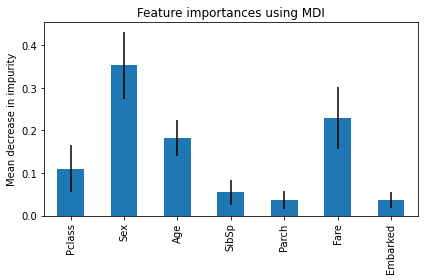

In [82]:
importances = best_clas.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_clas.estimators_], axis=0)
#feature_names = [f"feature {i}" for i in range(X.shape[1])]
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Las variables Sex, Fare  y Age son las más importantes para predecir si un pasajero sobrevivirá o no. Puede estar reflejando la clase social, la ubicación en el crucero, así como el orden en el que son evacuados.

In [ ]:
import pickle
filename = '/workspace/RandomForest/models/finalized_model.sav'
pickle.dump(best_clas, open(filename, 'wb'))

Referencias:

https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html
https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html#:~:text=test%20accuracy%3A%200.814-,Tree's%20Feature%20Importance%20from%20Mean%20Decrease%20in%20Impurity%20(MDI),of%20the%20most%20important%20features!